## Starting with the standard inputs!

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
bank = pd.read_csv('bank.csv',sep=';')

## Adding new variables to a dataframe with a condition!
Assume we want ot add a variable that captures if someone is older than 65 or not. If the person is older than 65 then assign a 1, otherwise 0.

In [4]:
bank.loc[bank.age >= 65, 'retired'] = 1 
bank.loc[bank.age < 65, 'retired'] = 0
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,retired
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0.0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0.0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0.0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0.0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0.0


In [5]:
bank.retired.mean()

0.019685910196859103

In [6]:
bank.retired.unique()

array([0., 1.])

## Converting the variable to integer

In [7]:
bank.retired = pd.to_numeric(bank.retired,downcast='integer')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,retired
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0


In [8]:
bank.retired.mean()

0.019685910196859103

## Adding a new variable as a modification of another variable

In [9]:
bank['age_decades'] = bank.age.values/10
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,retired,age_decades
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0,3.0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0,3.3
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0,3.5
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0,3.0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0,5.9


## Adding a new variable with a preset value
Sometimes we want to add data to a dataframe from a different source. We can for instance add a variable that always tkaes the value 5:

In [10]:
bank['zero'] = 0
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,retired,age_decades,zero
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0,3.0,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0,3.3,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0,3.5,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0,3.0,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0,5.9,0


## Aggregating data
It is often useful to aggregate data over different categories such as education or whether the person is a home owner or not. We can easily do this in Pandas as well.

In [12]:
bank.groupby(by='education').mean(numeric_only = True)

,age,balance,day,duration,campaign,pdays,previous,retired,age_decades,zero
education,,,,,,,,,,
primary,46.833333,1411.544248,15.505900,261.709440,2.865782,35.069322,0.460177,0.050147,4.683333,0.0
secondary,40.062446,1196.814397,15.977884,269.863833,2.734172,40.934085,0.528621,0.012576,4.006245,0.0
tertiary,39.645926,1775.423704,16.009630,256.881481,2.901481,39.824444,0.612593,0.013333,3.964593,0.0
unknown,45.299465,1701.245989,15.946524,250.449198,2.486631,41.983957,0.508021,0.042781,4.529947,0.0


In [13]:
bank.groupby(by='default').mean(numeric_only = True)

,age,balance,day,duration,campaign,pdays,previous,retired,age_decades,zero
default,,,,,,,,,,
no,41.194826,1450.550956,15.929584,264.355906,2.79865,40.111136,0.548481,0.020022,4.119483,0.0
yes,39.723684,-208.723684,15.078947,240.881579,2.50000,19.618421,0.197368,0.000000,3.972368,0.0


## Working with categorical data
From the above example we see that a lot of variables are missing. In particular, the categorical data is missing as we cannot take the mean over these. Assume we want to clean-up the variable called `y` and `loan`:

In [14]:
bank.y.unique()

array(['no', 'yes'], dtype=object)

In [15]:
bank.loan.unique()

array(['no', 'yes'], dtype=object)

We need to define a `dictionary` for the translation to something we can use when analyzing the data,

In [16]:
cat_clean = {"y":        {"yes": 1, "no": 0},
             "loan":     {"yes": 1, "no": 0 },
             "housing":  {"yes": 1, "no": 0 }}

With this dictionary we can replace the values in the dataset:

In [17]:
bank.replace(cat_clean, inplace=True)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,retired,age_decades,zero
0,30,unemployed,married,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0,0,3.0,0
1,33,services,married,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,0,0,3.3,0
2,35,management,single,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,0,0,3.5,0
3,30,management,married,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0,0,3.0,0
4,59,blue-collar,married,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,0,0,5.9,0


If we now aggregate over the different education levels again:

In [19]:
bank.groupby(by='education').mean(numeric_only = True)

,age,balance,housing,loan,day,duration,campaign,pdays,previous,y,retired,age_decades,zero
education,,,,,,,,,,,,,
primary,46.833333,1411.544248,0.564897,0.138643,15.505900,261.709440,2.865782,35.069322,0.460177,0.094395,0.050147,4.683333,0.0
secondary,40.062446,1196.814397,0.620121,0.180399,15.977884,269.863833,2.734172,40.934085,0.528621,0.106245,0.012576,4.006245,0.0
tertiary,39.645926,1775.423704,0.491111,0.128889,16.009630,256.881481,2.901481,39.824444,0.612593,0.142963,0.013333,3.964593,0.0
unknown,45.299465,1701.245989,0.443850,0.037433,15.946524,250.449198,2.486631,41.983957,0.508021,0.101604,0.042781,4.529947,0.0


## Statistical analysis
Python has several packages that do statistical analysis. As of now it is still quite fragmented and not standardized. Therefore, unless you want to implement a specific estimator yourself, you sometimes may need to go to a different software in order to run your analysis. **This may change in the future**.

In [20]:
# For linear regression
from statsmodels.formula.api import ols
import statsmodels.api as sm

# For other tests
import scipy
import scipy.stats

Let's assume we want to run a model that predicts the outcome, y, with balance. We would then run the following model:

\begin{align}
y = a + b_1 \times balance + ... + \varepsilon 
\end{align}

Using statsmodels, we can run this by specifying the model:

In [21]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,retired,age_decades,zero
0,30,unemployed,married,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0,0,3.0,0
1,33,services,married,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,0,0,3.3,0
2,35,management,single,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,0,0,3.5,0
3,30,management,married,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0,0,3.0,0
4,59,blue-collar,married,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,0,0,5.9,0


In [22]:
model = ols("y ~ balance + age + loan + housing + retired", bank)
estimates1 = model.fit()

The model is now fitted and we can inspect the results by accessing these from `estimates1`:

In [23]:
print(estimates1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     22.22
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           4.55e-22
Time:                        14:17:24   Log-Likelihood:                -1199.0
No. Observations:                4521   AIC:                             2410.
Df Residuals:                    4515   BIC:                             2448.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1716      0.022      7.706      0.0

## Categorical variables
We can add these non-numeric variables to our regressions as well:

In [24]:
# Check what categories exist:
bank.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [25]:
model = ols("y ~ C(marital)", bank)
estimates2 = model.fit()

In [26]:
estimates2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     9.549
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           7.27e-05
Time:                        14:17:28   Log-Likelihood:                -1244.4
No. Observations:                4521   AIC:                             2495.
Df Residuals:                    4518   BIC:                             2514.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1458      0.014     10.513      0.000       0.119       0.173
C(marital)[T.married]    -0.0468      0.015     -3.094      0.002      -0.076      -0.017
C(marital)[T.single]     -0.0062      0.017     -0.372      0.710      -0.039       0.026
==============================================================================
Omnibus:                     2030.750   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7009.445
Skew:                           2.395   Prob(JB):                         0.00
Kurtosis:                       6.777   Cond. No.                         6.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## The t-test
Unlike for instance stata where there is one command `ttest`, using `scipy` there are different functions for different t-tests:

- 1 Sample: `scipy.stats.ttest_1samp()`
- 2 Samples (unpaired): `scipy.stats.ttest_ind()`
- 2 Samples (paired): `scipy.stats.ttest_rel()`

In [27]:
# A one sample t-test
scipy.stats.ttest_1samp(bank.housing,popmean=0.5)

TtestResult(statistic=8.956305694693512, pvalue=4.814551752159298e-19, df=4520)

In [28]:
bank.housing.mean()

0.5660252156602521

In [29]:
# A two-sample paired t-test
scipy.stats.ttest_rel(bank.housing,bank.loan)

TtestResult(statistic=45.75816714806045, pvalue=0.0, df=4520)

In [30]:
bank.loan.mean()

0.1528422915284229

In [31]:
bank.balance[bank.age >= 40].mean()

1602.3236216943076

In [32]:
bank.balance[bank.age < 40].mean()

1247.62096069869

In [33]:
# A two-sample unpaired t-test
scipy.stats.ttest_ind(bank.balance[bank.age < 40],bank.balance[bank.age >= 40])

TtestResult(statistic=-3.9683300126049565, pvalue=7.350061042189551e-05, df=4519.0)

## Exercise
Time for an exercise.

In this exercise you will need to work with another dataset that comes built-in with one of the packages that anaconda includes. In this case it is from seaborn (another package to create graphs). to load the data set simply do the following:

In [35]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Your task:
1. Load the data
2. Create a graph of the relationship between the total bill and the tip.
3. Redo 2 with the tip as a percentage of the total_bill.
4. How does the tip (in percentage of the total bill) relate to the size of the group?
5. Aggregate the data and compute the median the tip in percent based on the time of the meal.
6. Run a regression that estimates the tip based on the total_bill. What does the intercept reveal?

## My solution

Text(0, 0.5, 'Tip')

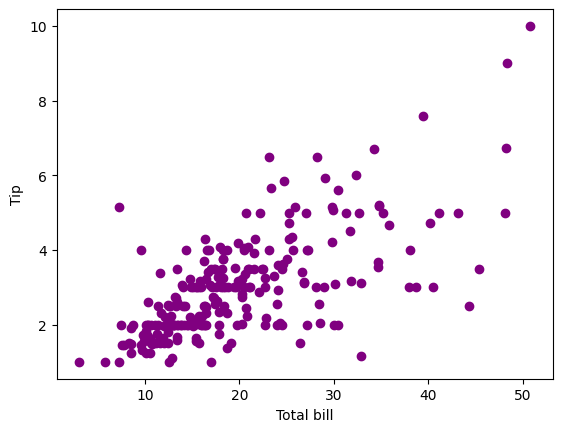

In [36]:
# Tips and total bill
fig, ax = plt.subplots()
ax.scatter(tips.total_bill.values,tips.tip.values,color='purple')
ax.set_xlabel('Total bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip (%)')

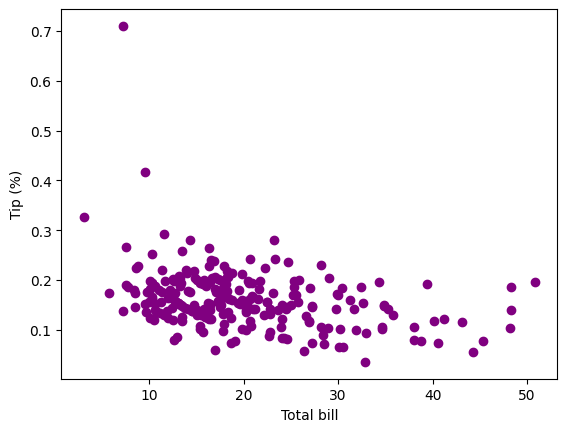

In [37]:
# Tips in percent
tips['tip_perc'] = tips.tip.values/tips.total_bill.values
fig, ax = plt.subplots()
ax.scatter(tips.total_bill.values,tips.tip_perc.values,color='purple')
ax.set_xlabel('Total bill')
ax.set_ylabel('Tip (%)')

In [38]:
# Relationship to group size
tips.groupby(by='size').mean(numeric_only = True)

,total_bill,tip,tip_perc
size,,,
1,7.242500,1.437500,0.217292
2,16.448013,2.582308,0.165719
3,23.277632,3.393158,0.152157
4,28.613514,4.135405,0.145949
5,30.068000,4.028000,0.141495
6,34.830000,5.225000,0.156229


In [40]:
# Relationship to time of the meal
tips.groupby(by='time').median(numeric_only = True)

,total_bill,tip,size,tip_perc
time,,,,
Lunch,15.965,2.25,2.0,0.154084
Dinner,18.390,3.00,2.0,0.155400


In [41]:
# Regression of tip depending on total bill:
model = ols("tip ~ total_bill", tips)
estimates2 = model.fit()
print(estimates2.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           6.69e-34
Time:                        14:18:27   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.0

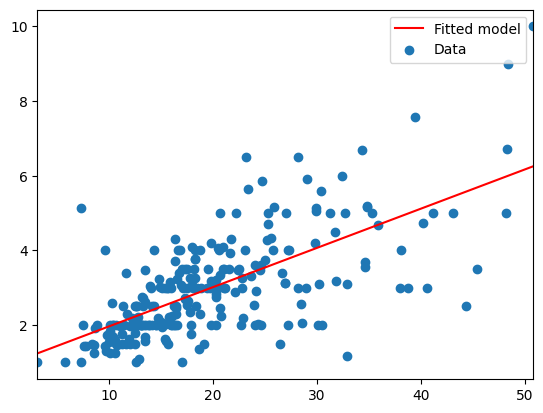

In [42]:
sm.graphics.abline_plot(model_results=estimates2, color='Red')
plt.scatter(x=tips.total_bill,
            y=tips.tip)
plt.legend(['Fitted model', 'Data'])
plt.show()

## Additional topic: Heteroscedasticity!
Several methods to correct standard errors are also built-in to `statsmodels`. These are labeled $HC0, HC1, HC2$ and $HC3$. The labeling here is consistent with that used in R and originates from the MacKinnon and White (1986) paper.

Robust standard errors as they are implemented in Stata correspond to *HC1*.

On our case we can re-estimate using these standard errors:

In [43]:
estimates3 = model.fit(cov_type='HC1')
print(estimates3.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     79.69
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           1.12e-16
Time:                        14:18:31   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.205      4.480      0.0